In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
shutil.copytree('/content/drive/MyDrive/Data','/content/Data')

'/content/Data'

In [3]:
import pandas as pd
import re
import numpy as np

In [4]:
with open('Data/text-and-id.txt','r') as file:
    lines=file.readlines()

data=[]
for line in lines:
    line_parts=line.split()
    id=int(line_parts[0])
    sentence=' '.join(line_parts[1:])
    data.append((id,sentence))

In [5]:
df=pd.DataFrame(data,columns=["id","sentence"])
df['id']=df['id'].astype(int)
df=df.sort_values('id',ascending=True)

In [6]:
df.head()

,id,sentence
957,1,Besides these forests naturally developed fore...
1607,2,Your mother cleans the rice by separating husk...
1083,3,All free gifts of nature and all things which ...
1412,4,Humanism - the concept that man is the measure...
1344,5,Various designs in clothing are found dependin...


In [7]:
with open('./Data/pairs-label-training (1).txt','r') as file:
    lines=file.readlines()

data=[]
for line in lines:
  line_parts=line.split(', ')
  id1=(line_parts[0])
  id2=(line_parts[1])
  line_parts=line.split()
  # print(line_parts[2])
  label=line_parts[2]
  data.append((id1,id2,label))

df1=pd.DataFrame(data,columns=["id1","id2","label"])


In [8]:
df1

,id1,id2,label
0,98,651,0
1,696,1870,1
2,1073,1620,0
3,167,633,0
4,4,640,0
...,...,...,...
155946,546,1512,1
155947,720,1902,1
155948,1112,1591,0
155949,396,1472,1


In [9]:
df1['id1']=df1['id1'].astype(int)
df1['id2']=df1['id2'].astype(int)
df1['label']=df1['label'].astype(int)
df1.head()

,id1,id2,label
0,98,651,0
1,696,1870,1
2,1073,1620,0
3,167,633,0
4,4,640,0


In [10]:
data=[]
for index,row in df1.iterrows():
    idx1=row['id1']
    idx2=row['id2']
    sen1=df[df['id']==idx1]['sentence'].values
    sen2=df[df['id']==idx2]['sentence'].values
    label=row['label']
    data.append((sen1,sen2,label))

In [11]:
gender_df=pd.DataFrame(data,columns=['sentence1','sentence2','label'])

In [12]:
gender_df['sentence1'] = gender_df['sentence1'].apply(lambda x:x[0])
gender_df['sentence2'] = gender_df['sentence2'].apply(lambda x:x[0])

In [13]:
gender_df.head()

,sentence1,sentence2,label
0,From the very ancient periods men used to appl...,Men and women of all ages participate in this ...,0
1,So he used sharp stones and bones to loosen th...,Can you imagine a world in which we cannot run...,1
2,"In a closed electric circuit, the electric cur...",Here is a diagram to show what is really happe...,0
3,She will not be able to understand all these a...,He must possess all the qualifications necessa...,0
4,Humanism - the concept that man is the measure...,"Again , he spends his earned money to buy esse...",0


In [14]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155951 entries, 0 to 155950
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentence1  155951 non-null  object
 1   sentence2  155951 non-null  object
 2   label      155951 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


<Axes: ylabel='Frequency'>

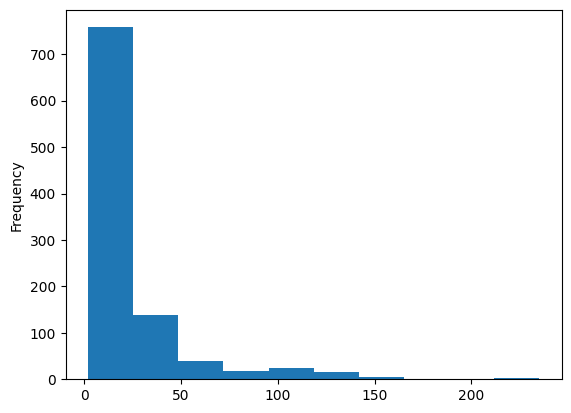

In [15]:
gender_df['sentence1'].sample(1000).apply(lambda x:len(x.split(' '))).plot(kind='hist')

<Axes: ylabel='Frequency'>

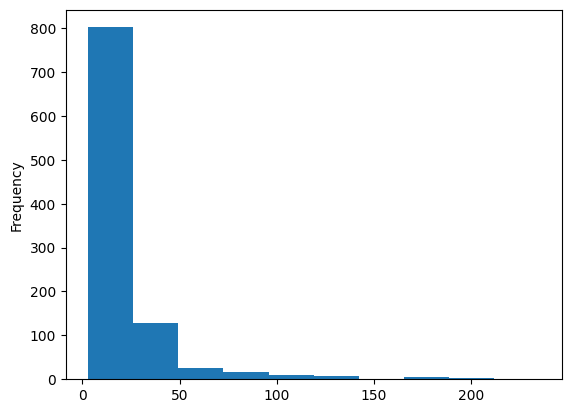

In [16]:
gender_df['sentence2'].sample(1000).apply(lambda x:len(x.split(' '))).plot(kind='hist')

In [17]:
print(gender_df.iloc[4]['sentence1'])
print(gender_df.iloc[4]['sentence2'])
print(gender_df.iloc[4]['label'])

Humanism - the concept that man is the measure of all things
Again , he spends his earned money to buy essential goods to satisfy his wants by the consumption of those goods .
0


In [18]:
gender_df.isna().sum()

sentence1    0
sentence2    0
label        0
dtype: int64

In [19]:
gender_df['sentence1']=gender_df['sentence1'].astype(str)
gender_df['sentence2']=gender_df['sentence2'].astype(str)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y=gender_df['label'].values
gender_df.drop('label',axis=1,inplace=True)

In [22]:
y

array([0, 1, 0, ..., 0, 1, 0])

In [23]:
x=gender_df[:].values

In [24]:
x

array([['From the very ancient periods men used to apply ointments on their faces and on special parts of the body to increase the beauty , for religious reasons , in wars , and many festivals and to protect the skin from excessive cold or heat .',
        'Men and women of all ages participate in this celebration .'],
       ['So he used sharp stones and bones to loosen the soil and learnt to produce his food .',
        'Can you imagine a world in which we cannot run motors or trains?'],
       ['In a closed electric circuit, the electric current passes from one terminal of the electric cell to the other terminal.',
        'Here is a diagram to show what is really happening to the compounds in this reaction. The purpose of the candle shown in the picture is to set the hydrogen gas alight, in other words: to provide enough energy for the reaction to start.'],
       ...,
       ['You will see that when water inside and outside the cylinder comes to the same level , the disc falls dow

In [25]:
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,shuffle=True,random_state=42)

In [26]:
X_train.shape,X_val.shape,X_test.shape

((99808, 2), (24952, 2), (31191, 2))

In [27]:
y_train.shape,y_val.shape,y_test.shape

((99808,), (24952,), (31191,))

In [28]:
!pip install transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.1 MB/s eta 0:00:00


In [29]:
import tensorflow as tf
import transformers

In [30]:
y_train=tf.keras.utils.to_categorical(y_train)
y_val=tf.keras.utils.to_categorical(y_val)
# y_test=tf.keras.utils.to_categorical(y)

In [31]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [32]:
batch_size=128
max_length=512
epochs=2

#### 0 if both biased or both unbiased
#### 1 if one is biased and other is unbiased

In [33]:
class BertSemanticDataGenerator(tf.keras.utils.Sequence):
    def __init__(
        self,
        sentence_pairs,
        labels,
        batch_size=batch_size,
        shuffle=True,
        include_targets=True,
    ):
        self.sentence_pairs = sentence_pairs
        self.labels = labels
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.include_targets = include_targets
        self.tokenizer = transformers.BertTokenizer.from_pretrained(
            "bert-base-uncased", do_lower_case=True
        )
        self.indexes = np.arange(len(self.sentence_pairs))
        self.on_epoch_end()

    def __len__(self):
      return (len(self.sentence_pairs) + self.batch_size - 1) // self.batch_size

    def __getitem__(self, idx):
        indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
        sentence_pairs = self.sentence_pairs[indexes]
        encoded_dict = self.tokenizer.batch_encode_plus(
            sentence_pairs.tolist(),
            add_special_tokens=True,
            max_length=max_length,
            return_attention_mask=True,
            return_token_type_ids=True,
            pad_to_max_length=True,
            return_tensors="tf",
        )
        input_ids = np.array(encoded_dict["input_ids"], dtype="int32")
        attention_masks = np.array(encoded_dict["attention_mask"], dtype="int32")
        token_type_ids = np.array(encoded_dict["token_type_ids"], dtype="int32")

        if self.include_targets:
            labels = np.array(self.labels[indexes], dtype="int32")
            return [input_ids, attention_masks, token_type_ids], labels
        else:
            return [input_ids, attention_masks, token_type_ids]

    def on_epoch_end(self):
        if self.shuffle:
            np.random.RandomState(42).shuffle(self.indexes)


In [34]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    input_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="input_ids"
    )
    attention_masks = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="attention_masks"
    )
    token_type_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="token_type_ids"
    )
    bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")
    bert_model.trainable = False

    bert_output = bert_model.bert(
        input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
    )
    sequence_output = bert_output.last_hidden_state
    pooled_output = bert_output.pooler_output
    bi_lstm = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)
    )(sequence_output)
    avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
    max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
    concat = tf.keras.layers.concatenate([avg_pool, max_pool])
    dropout = tf.keras.layers.Dropout(0.3)(concat)
    output = tf.keras.layers.Dense(64, activation="linear")(dropout)
    output = tf.keras.layers.Dense(2, activation="softmax")(dropout)
    model = tf.keras.models.Model(
        inputs=[input_ids, attention_masks, token_type_ids], outputs=output
    )

    model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(),
        loss="categorical_crossentropy",
        metrics=["acc"],
    )

print(f"Strategy: {strategy}")
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Strategy: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7f35a40db280>
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',        

In [35]:
train_data = BertSemanticDataGenerator(
    X_train,
    y_train,
    batch_size=batch_size,
    shuffle=True,
)
valid_data = BertSemanticDataGenerator(
    X_val,
    y_val,
    batch_size=batch_size,
    shuffle=False,
)

In [36]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epochs,
    use_multiprocessing=True,
    workers=-1,
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/2
780/780 [==============================] - ETA: 0s - loss: 0.1096 - acc: 0.9502

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


780/780 [==============================] - 5682s 7s/step - loss: 0.1096 - acc: 0.9502 - val_loss: 0.0058 - val_acc: 0.9987
Epoch 2/2
780/780 [==============================] - 5665s 7s/step - loss: 0.0088 - acc: 0.9974 - val_loss: 0.0011 - val_acc: 1.0000
